# 
<span style="font-family:MV Boli; font-weight:Bold; font-size:2.3em; color:#00b3e5;"> A Python Code To Perform FFT on Signals

##### 
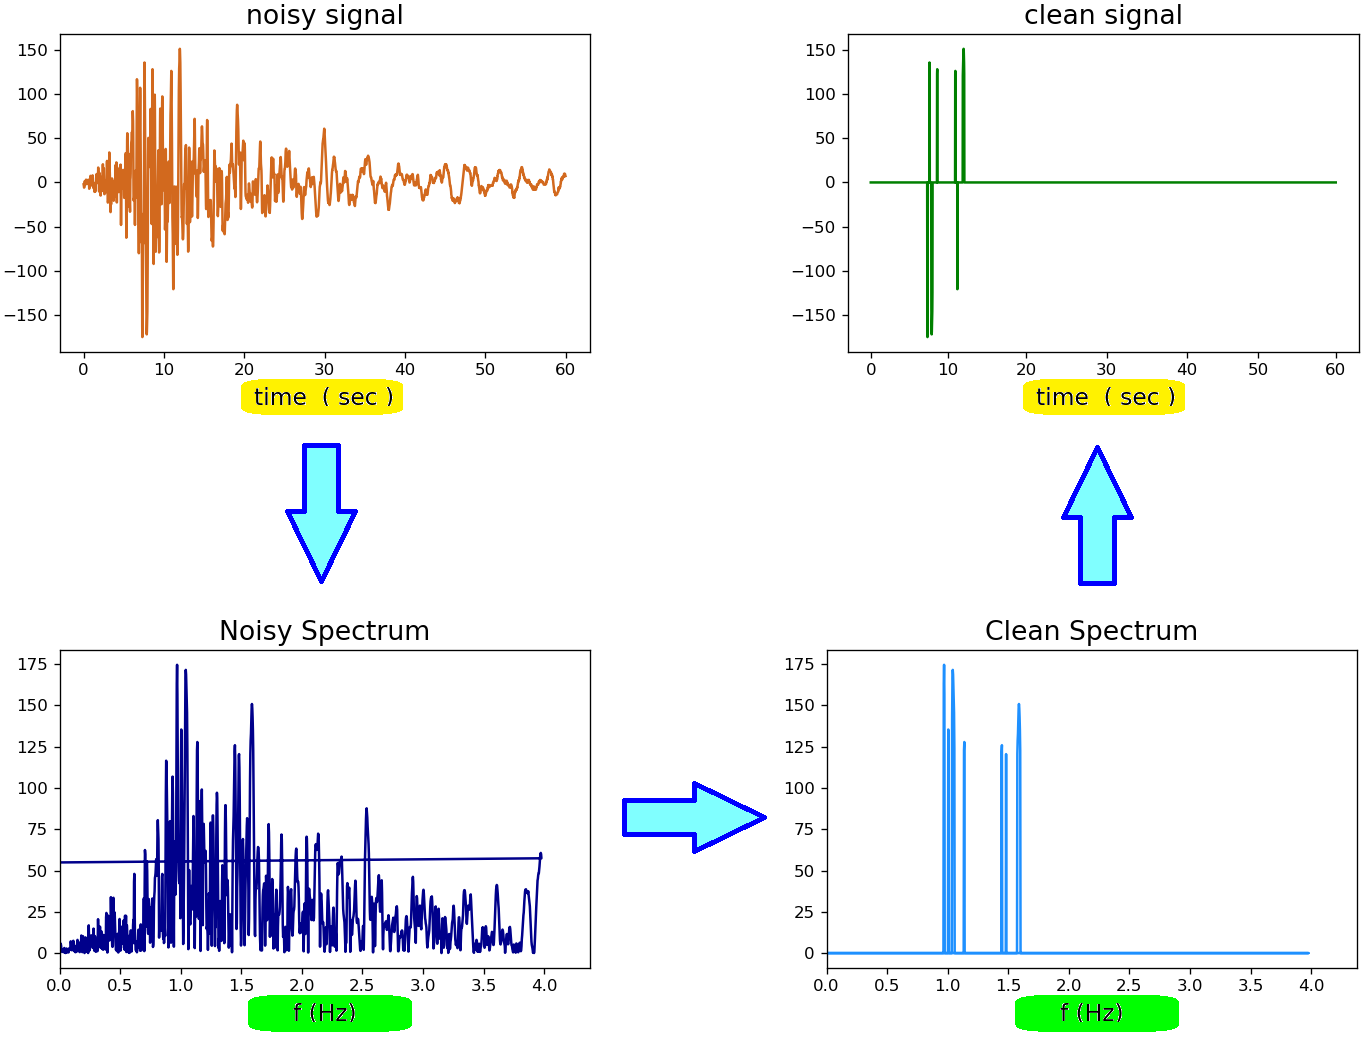

##### 

# 
<span style="font-family:MV Boli; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Importing Libraries

In [1]:
# (auto)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq, ifft

# 
<span style="font-family:MV Boli; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Reading The Noisy Signal

In [2]:
# (input) signal & dt

noisy_signal = pd.read_csv('Hollister_2.csv',header=0)
dt = 0.02  # (second)

# 
<span style="font-family:MV Boli; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Generating Time Domain, t (seconds)

In [3]:
# (auto) Time Domain
t0 = 0
t1 = len( noisy_signal )*dt
t  = np.arange(t0,t1,dt)
n  = len(t)

# 
<span style="font-family:MV Boli; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Visualizing Noisy Signal in its Time Domain

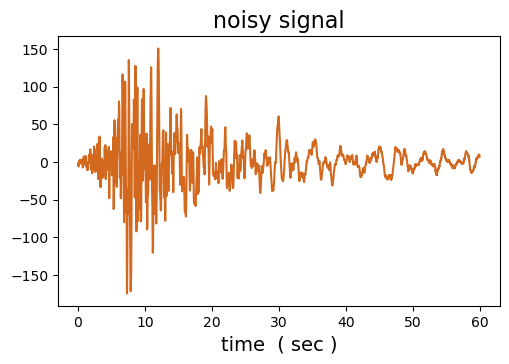

In [4]:
# (auto) Plot  noisy_signal : time
fig, ax = plt.subplots( figsize=(5.7,3.5) )
ax.plot( t, noisy_signal, color='chocolate', linewidth=1.5 ) 
plt.title('noisy signal',fontsize=16) 
plt.xlabel("time  ( sec )", fontsize=14)
plt.savefig('Noisy_Signal.png', dpi=120) 
plt.show()

# 
<span style="font-family:MV Boli; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Performing FFT:
 - <span style="font-family:MV Boli; font-size:1.5em; color:#00b3e5;"> Generaying Frequency Domain, f (Hz)
 - <span style="font-family:MV Boli; font-size:1.5em; color:#00b3e5;"> Generating Noisy Spectrum

In [5]:
# (auto) Frequency Domain, f (Hz)
f_Hz  = fftfreq(n,dt) /(2*np.pi)

# (auto) Noisy Spectrum
noisy_spec     = fft( noisy_signal )    # ( r + i )            
noisy_spec_val = np.abs( noisy_spec )   # ( r^2 + i^2 )^.5

# 
<span style="font-family:MV Boli; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Visualizing Noisy Spectrum in its Frequency Domain

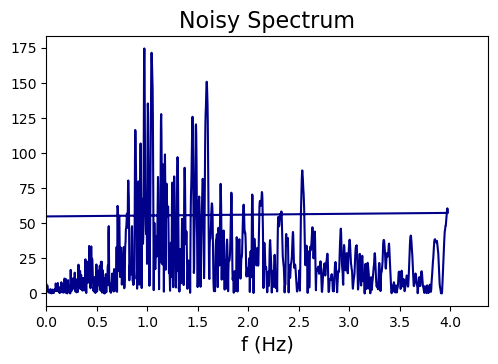

In [6]:
# (auto) plot  noisy_spec : f_Hz 
fig,ax = plt.subplots( figsize=(5.7,3.5) )
ax.plot(  f_Hz, noisy_spec_val, color='darkblue', linewidth=1.5 )  
plt.title("Noisy Spectrum",fontsize=16)
plt.xlabel('f (Hz)',fontsize=14)
plt.xlim(0,) 
plt.savefig('Noisy_Spectrum.png', dpi=120)
plt.show()

# 
<span style="font-family:MV Boli; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Determining Threshhold
 - everything less will be treated as noise

In [7]:
# (input) 
Threshhold = 120

# 
<span style="font-family:MV Boli; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Generating Clean Spectrum
 - ( By Removing the Noise from Noisy Spectrum )

In [8]:
# (auto) removing the noise    
indices        = noisy_spec_val > Threshhold   # filters out those value under Threshhold
clean_spec     = indices * noisy_spec          # Noise Frequency will be set to 0           
clean_spec_val = np.abs( clean_spec )

# 
<span style="font-family:MV Boli; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Visualizing Clean Spectrum in its Frequency Domain
 - main frequencies will get revealed

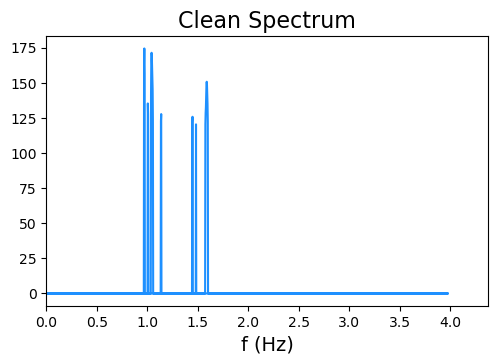

In [9]:
# (auto) plot  clean_spec : f_Hz 
fig,ax = plt.subplots( figsize=(5.7,3.5) )
ax.plot(  f_Hz, clean_spec_val, color='dodgerblue', linewidth=1.5 )  
plt.title("Clean Spectrum",fontsize=16)
plt.xlabel('f (Hz)',fontsize=14)
plt.xlim(0,)
plt.savefig('Clean_Spectrum.png', dpi=120) 
plt.show()

# 
<span style="font-family:MV Boli; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Generating Clean Signal

In [10]:
# (auto) inverse back to time domain data
clean_signal = ifft( clean_spec )

# 
<span style="font-family:MV Boli; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Visualizing Clean Signal in its Time Domain

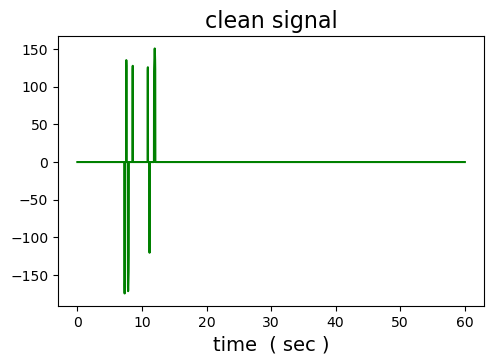

In [11]:
# (auto) Plot  clean_signal : time
fig, ax = plt.subplots( figsize=(5.5,3.5) )
ax.plot( t, np.real(clean_signal), color='green', linewidth=1.5 )
plt.title('clean signal',fontsize=16) 
plt.xlabel("time  ( sec )", fontsize=14)
plt.savefig('Clean_Signal.png', dpi=120)
plt.show() 

##### 